We are here to evaluate baby. It is 4:24 AM and this is the best I have felt in a long time.

In [12]:
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

In [13]:
original_data = pd.read_csv("../Data/tracking_week_1.csv")

In [2]:
# import the total train
total_train = pd.read_csv("../Data/training_data_total.csv")

In [29]:
total_train['position_9'].value_counts(normalize=True)

position_9
WR    0.236643
G     0.199339
C     0.198951
RB    0.130756
QB    0.091315
TE    0.085875
T     0.049932
FB    0.007189
Name: proportion, dtype: float64

In [ ]:
# interpreting the tree
total_train['position_7'].value_counts(normalize=True)

position_7
WR    0.246551
G     0.224597
T     0.199534
RB    0.104721
C     0.086847
QB    0.082767
TE    0.054983
Name: proportion, dtype: float64

In [30]:
total_train['position_5'].value_counts(normalize=True)

position_5
T     0.257820
WR    0.239751
TE    0.165145
G     0.151156
RB    0.137362
C     0.029920
QB    0.018846
Name: proportion, dtype: float64

In [31]:
total_train['position_4'].value_counts(normalize=True)

position_4
T     0.228677
TE    0.225957
WR    0.153487
G     0.149796
RB    0.123761
C     0.076938
QB    0.041383
Name: proportion, dtype: float64

In [32]:
total_train['position_6'].value_counts(normalize=True)

position_6
T     0.295318
WR    0.213911
G     0.206334
RB    0.120459
TE    0.072081
QB    0.049932
C     0.041772
DT    0.000194
Name: proportion, dtype: float64

<Axes: xlabel='yardsGained', ylabel='Count'>

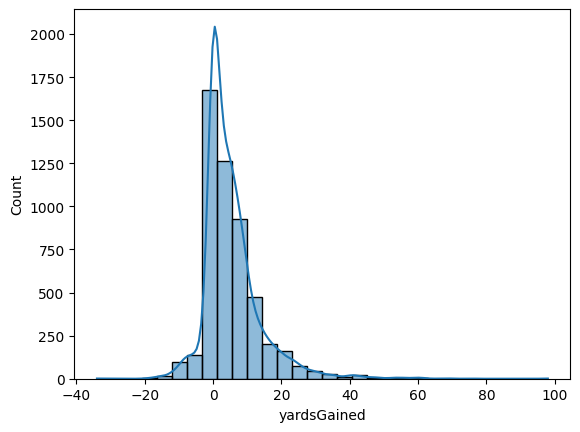

In [37]:
sns.histplot(total_train['yardsGained'], kde=True, bins=30)

In [34]:
total_train['yardsGained'].describe()

count    5147.000000
mean        5.435399
std         8.560492
min       -34.000000
25%         0.000000
50%         4.000000
75%         8.000000
max        98.000000
Name: yardsGained, dtype: float64

In [3]:
# import data frames 
train_results = pd.read_csv("../Modeling/train_pca.csv")
test_results = pd.read_csv("../Modeling/test_pca.csv")

In [51]:
# first create our y_pred
train_results["y_pred"] = train_results.apply(lambda row: row[row["treat"]], axis=1)
test_results["y_pred"] = test_results.apply(lambda row: row[row["treat"]], axis=1)

In [52]:
def regression_metrics(y_true, y_pred):

    # Calculate metrics
    metrics = {
        "Mean Absolute Error": mean_absolute_error(y_true, y_pred),
        "Mean Squared Error": mean_squared_error(y_true, y_pred),
        "Root Mean Squared Error": np.sqrt(mean_squared_error(y_true, y_pred))
    }
    
    # Convert to DataFrame for formatting
    metrics_df = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
    
    # Print the table
    return metrics_df

### Regular 

In [35]:
# Train with regular data
regression_metrics(train_results['outcomes'], train_results['y_pred'])

,Metric,Value
0,Mean Absolute Error,11.916729
1,Mean Squared Error,514.360816
2,Root Mean Squared Error,22.679524


In [38]:
regression_metrics(test_results['outcome'], test_results['y_pred'])

,Metric,Value
0,Mean Absolute Error,10.712453
1,Mean Squared Error,386.612452
2,Root Mean Squared Error,19.662463


### Embeddings Only

In [12]:
regression_metrics(train_results['outcomes'], train_results['y_pred'])

,Metric,Value
0,Mean Absolute Error,19.936390
1,Mean Squared Error,2920.490750
2,Root Mean Squared Error,54.041565


In [14]:
regression_metrics(test_results['outcomes'], test_results['y_pred'])

,Metric,Value
0,Mean Absolute Error,18.765781
1,Mean Squared Error,2285.331423
2,Root Mean Squared Error,47.805140


### Combo

In [6]:
regression_metrics(train_results['outcomes'], train_results['y_pred'])

,Metric,Value
0,Mean Absolute Error,19.381024
1,Mean Squared Error,4614.204499
2,Root Mean Squared Error,67.927936


In [7]:
regression_metrics(test_results['outcomes'], test_results['y_pred'])

,Metric,Value
0,Mean Absolute Error,16.075176
1,Mean Squared Error,1405.168514
2,Root Mean Squared Error,37.485577


### All

In [41]:
regression_metrics(train_results['outcomes'], train_results['y_pred'])

,Metric,Value
0,Mean Absolute Error,11.172398
1,Mean Squared Error,479.149954
2,Root Mean Squared Error,21.889494


In [43]:
regression_metrics(test_results['outcomes'], test_results['y_pred'])

,Metric,Value
0,Mean Absolute Error,12.141492
1,Mean Squared Error,525.449169
2,Root Mean Squared Error,22.922678


### PCA 


In [53]:
regression_metrics(train_results['outcomes'], train_results['y_pred'])

,Metric,Value
0,Mean Absolute Error,10.356406
1,Mean Squared Error,303.386469
2,Root Mean Squared Error,17.417993


In [54]:
regression_metrics(test_results['outcomes'], test_results['y_pred'])

,Metric,Value
0,Mean Absolute Error,11.820956
1,Mean Squared Error,402.597695
2,Root Mean Squared Error,20.064837


### Prescription Outcome compared To Live Data!

In [8]:
print(f"The actual mean in expected yards: {test_results['outcomes'].mean()}")

The actual mean in expected yards: 5.7312588401697315


In [11]:
print(f"The prescription mean in expected yards: {6.282268634463435}")

The prescription mean in expected yards: 6.282268634463435
